In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta

In [4]:
df_confirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")

In [5]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7


In [6]:
df_confirmed.drop(columns=['Province/State'], inplace=True)

In [7]:
df_confirmed.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7


In [8]:
df_confirmed.drop(df_confirmed.loc[:, '1/22/20':'3/28/20'].columns, axis = 1, inplace = True) 

In [9]:
df_confirmed.head()

,Country/Region,Lat,Long,3/29/20
0,Afghanistan,33.0000,65.0000,120
1,Albania,41.1533,20.1683,212
2,Algeria,28.0339,1.6596,511
3,Andorra,42.5063,1.5218,334
4,Angola,-11.2027,17.8739,7


In [11]:
df_confirmed = df_confirmed.groupby(['Country/Region']).agg({'3/29/20':'sum'}).reset_index()

In [14]:
df_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country/Region  177 non-null    object
 1   3/29/20         177 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.9+ KB


In [15]:
df_recovered = pd.read_csv("time_series_covid19_recovered_global.csv")

In [16]:
df_recovered.drop(columns=['Province/State'], inplace=True)

In [17]:
df_recovered.drop(df_recovered.loc[:, '1/22/20':'3/28/20'].columns, axis = 1, inplace = True) 

In [18]:
df_recovered.head()

,Country/Region,Lat,Long,3/29/20
0,Afghanistan,33.0000,65.0000,2
1,Albania,41.1533,20.1683,33
2,Algeria,28.0339,1.6596,31
3,Andorra,42.5063,1.5218,1
4,Angola,-11.2027,17.8739,0


In [19]:
df_recovered = df_recovered.groupby(['Country/Region']).agg({'3/29/20':'sum'}).reset_index()

In [20]:
df_recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country/Region  177 non-null    object
 1   3/29/20         177 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.9+ KB


In [21]:
df_deaths = pd.read_csv("time_series_covid19_deaths_global.csv")
df_deaths.drop(columns=['Province/State'], inplace=True)
df_deaths.drop(df_deaths.loc[:, '1/22/20':'3/28/20'].columns, axis = 1, inplace = True) 
df_deaths = df_deaths.groupby(['Country/Region']).agg({'3/29/20':'sum'}).reset_index()

df_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country/Region  177 non-null    object
 1   3/29/20         177 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.9+ KB


In [22]:
df_deaths.head()

,Country/Region,3/29/20
0,Afghanistan,4
1,Albania,10
2,Algeria,31
3,Andorra,6
4,Angola,2


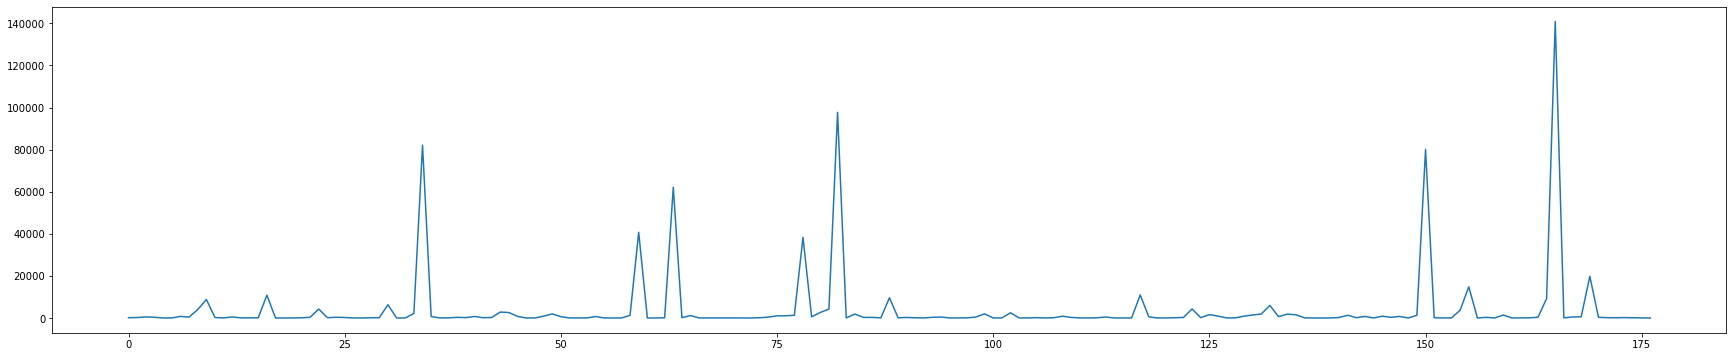

In [23]:
plt.figure(figsize=(30,6))
plt.plot(df_confirmed["3/29/20"],label="confirmed Cases")

Text(0.5, 0, 'confirmed cases')

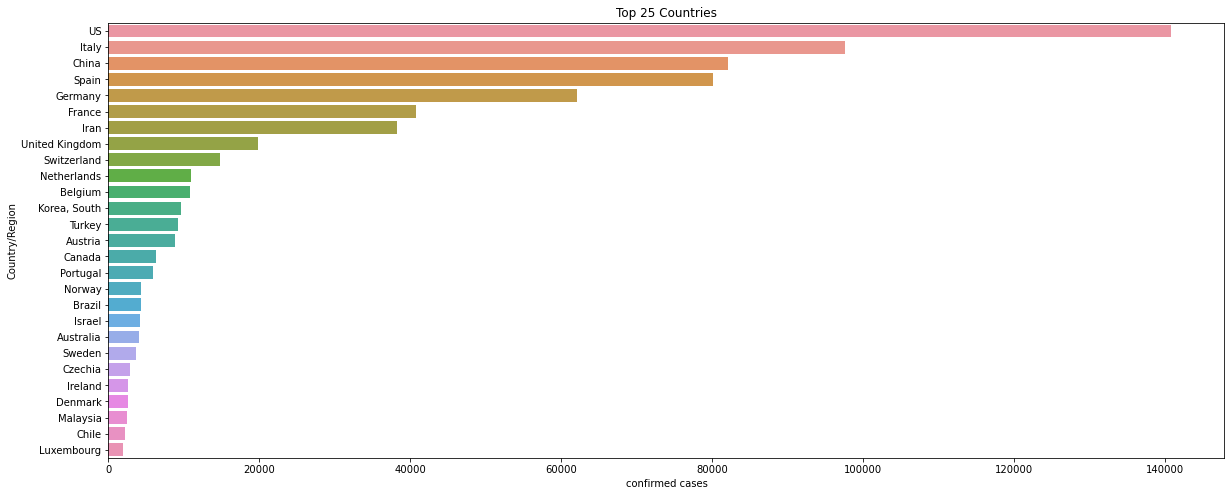

In [31]:
fig, (ax1) = plt.subplots(1,figsize=(20,8))
countrywise_plot_confirmed=df_confirmed[df_confirmed["3/29/20"]>50].sort_values(["3/29/20"],
                                                                                   ascending=False).head(27)
sns.barplot(x=countrywise_plot_confirmed["3/29/20"],y=countrywise_plot_confirmed['Country/Region'],ax=ax1)
ax1.set_title("Top 25 Countries")
ax1.set_xlabel("confirmed cases")

Text(0.5, 0, 'recovered cases')

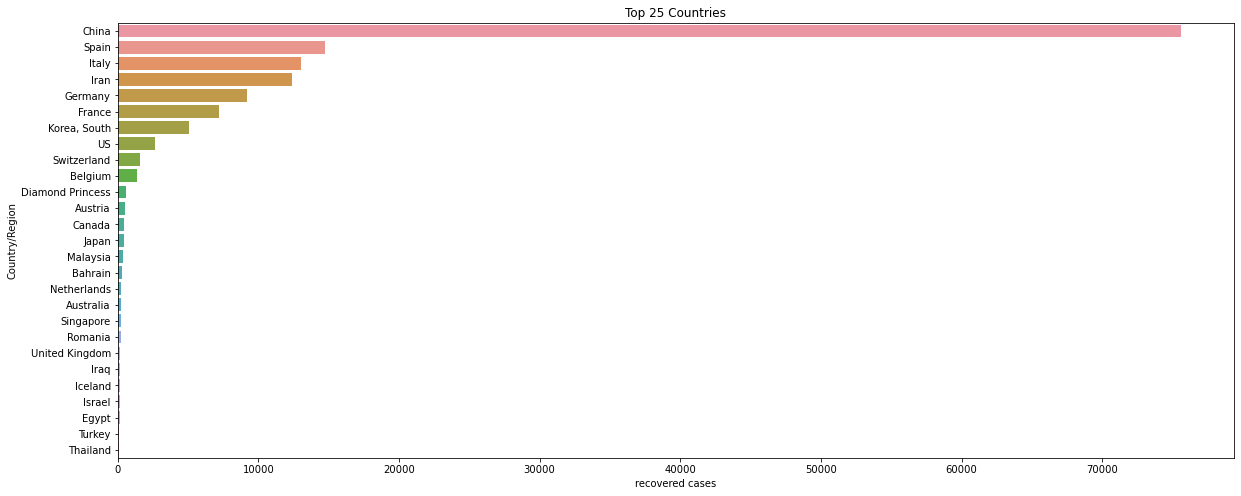

In [33]:
fig, (ax1) = plt.subplots(1,figsize=(20,8))
countrywise_plot_recovered=df_recovered[df_recovered["3/29/20"]>50].sort_values(["3/29/20"],
                                                                                   ascending=False).head(27)
sns.barplot(x=countrywise_plot_recovered["3/29/20"],y=countrywise_plot_recovered['Country/Region'],ax=ax1)
ax1.set_title("Top 25 Countries")
ax1.set_xlabel("recovered cases")

Text(0.5, 0, 'death cases')

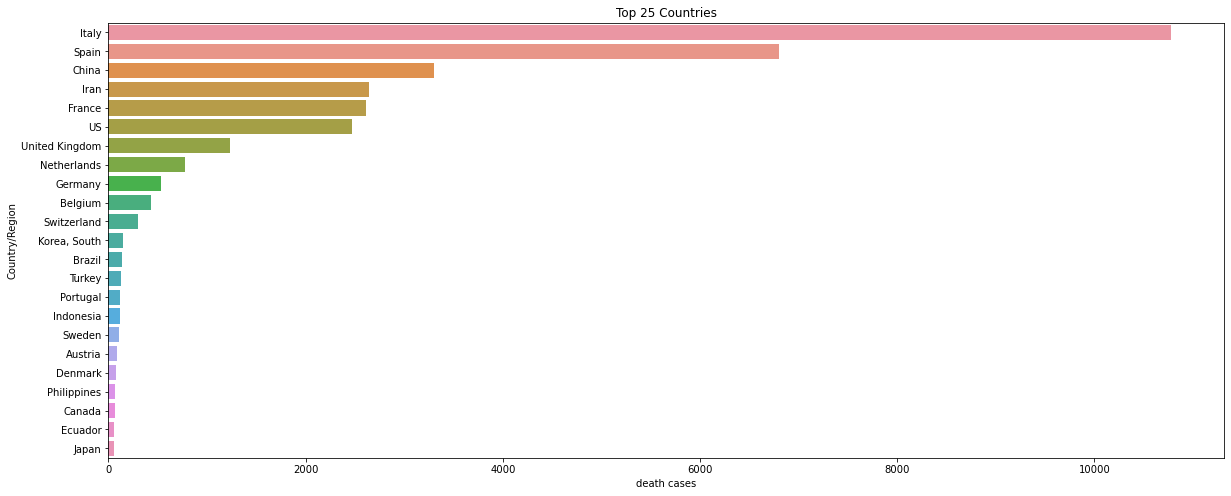

In [35]:
fig, (ax1) = plt.subplots(1,figsize=(20,8))
countrywise_plot_deaths=df_deaths[df_deaths["3/29/20"]>50].sort_values(["3/29/20"],
                                                                                   ascending=False).head(27)
sns.barplot(x=countrywise_plot_deaths["3/29/20"],y=countrywise_plot_deaths['Country/Region'],ax=ax1)
ax1.set_title("Top 25 Countries")
ax1.set_xlabel("death cases")